In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install livelossplot
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKerasTF

In [3]:
PATH_TO_DS = '/content/drive/My Drive/DataSet/UMIC'

In [4]:
img_size = 64
batch_size = 64
train_datagen = ImageDataGenerator(horizontal_flip=True)
PATH_TO_TRAIN = PATH_TO_DS + '/train'
train_data_generator = train_datagen.flow_from_directory(PATH_TO_TRAIN,
                                             target_size=(img_size,img_size),
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=True)

val_datagen = ImageDataGenerator(horizontal_flip=True)
PATH_TO_VAL = PATH_TO_DS + '/Val'
val_data_generator = val_datagen.flow_from_directory(PATH_TO_VAL,
                                             target_size=(img_size,img_size),
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=True)

test_datagen = ImageDataGenerator(horizontal_flip=True)
PATH_TO_TEST = PATH_TO_DS + '/test'
test_data_generator = test_datagen.flow_from_directory(PATH_TO_TEST,
                                             target_size=(img_size,img_size),
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode='binary',
                                             shuffle=True)

Found 903 images belonging to 2 classes.
Found 198 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [5]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(64, 64,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

In [6]:
epochs = 100
steps_per_epoch = train_data_generator.n//train_data_generator.batch_size
validation_steps = val_data_generator.n//val_data_generator.batch_size

In [8]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/DataSet/UMIC/model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)   # saving model with highest accuracy

callbacks = [PlotLossesKerasTF(), checkpoint]                          

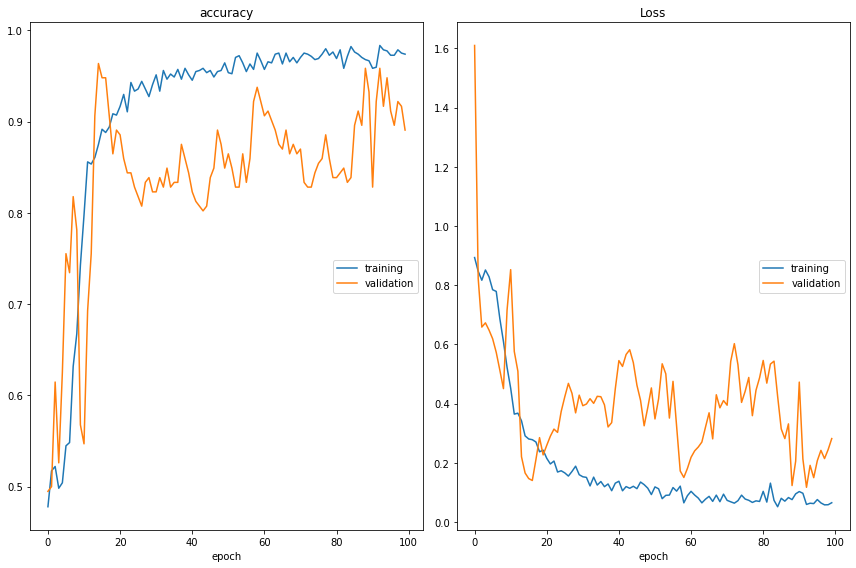

accuracy
	training         	 (min:    0.478, max:    0.983, cur:    0.974)
	validation       	 (min:    0.495, max:    0.964, cur:    0.891)
Loss
	training         	 (min:    0.052, max:    0.894, cur:    0.066)
	validation       	 (min:    0.118, max:    1.610, cur:    0.282)

Epoch 00100: saving model to /content/drive/My Drive/DataSet/UMIC/model_weights.h5
14/14 [==============================] - 3s 223ms/step - loss: 0.0656 - accuracy: 0.9738 - val_loss: 0.2822 - val_accuracy: 0.8906


In [9]:

history = model.fit(
    x=train_data_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = val_data_generator,
    validation_steps = validation_steps,
    callbacks= callbacks
)

In [11]:
model.load_weights("/content/drive/My Drive/DataSet/UMIC/model_weights.h5")

In [14]:
loss, acc = model.evaluate(train_data_generator, verbose=0)
print('{}% accuracy on training set'.format(acc *100))

92.69102811813354% accuracy on training set


In [15]:
loss, acc = model.evaluate(val_data_generator, verbose=0)
print('{}% accuracy on training set'.format(acc *100))

88.88888955116272% accuracy on training set


In [16]:
loss, acc = model.evaluate(test_data_generator, verbose=0)
print('{}% accuracy on training set'.format(acc *100))

93.87755393981934% accuracy on training set
